In [1]:
import kagglehub
import matplotlib.pyplot as plt
import matplotlib as mpl

# Download latest version
#path = kagglehub.dataset_download("hojjatk/mnist-dataset")
#print("Path to dataset files:", path)

#Or: 

from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1,as_frame=False) #we'll use an numpy array for acess num vectors
mnist.keys()


c:\Users\augusto\.vscode\Data Sci and Ml\Linear_Regression\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
#caracteristcs
X=mnist["data"]
y=mnist["target"]
y.shape # size


(70000,)

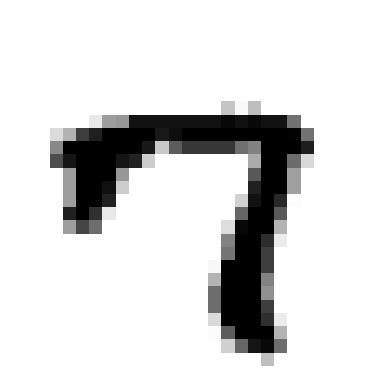

In [3]:
import random
import numpy as np


digit1 =X[6666] #num object,using as vector
digittt=digit1.reshape(28,28)

plt.imshow(digittt,cmap='binary')
plt.axis('off')
plt.show()
#y[6666]=7

y=y.astype(np.uint8) #nums str will be atributes as int

In [4]:
#Training and data
from sklearn.linear_model import SGDClassifier



x_train,x_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[:60000]

y_train7=(y_train==7)
y_test7=(y_test==7)

sgd_class=SGDClassifier(random_state=4442)
sgd_class.fit(x_train,y_train7) #train using the vector-target that we want
sgd_class.predict([X[4]])

array([False])

In [5]:
#Evaluating
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.base import BaseEstimator

evalll=cross_val_score(sgd_class,x_train,y_train7,scoring="accuracy",cv=3) # %accuracy in preview

#crating a vector full true for each data that is not 7
class Seven_never(BaseEstimator):
    def fit(self,X,y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool) # --> create full-True vector for each label-row diferent of y 


sv=Seven_never()
#cross validation is the part that verify relation between seven_class and data
eval_verify=cross_val_score(sv,x_train,y_train7,scoring="accuracy",cv=3) #

print(evalll,eval_verify)

[0.9772  0.9738  0.97765] [0.89535 0.8984  0.893  ]


In [7]:
#Confusion Matrix:
#what is the proportion of predict the Y as result of imput/param X?
from sklearn.metrics import confusion_matrix

confuison_vector=cross_val_predict(sgd_class,x_train,y_test7,cv=3) #compare 5 vectors with specifc other vectors
print(confuison_vector)

con_table= confusion_matrix(y_train7,confuison_vector) #confusion [not 7(NEG CLASS): true neg | false pos  ,7(POSITIVE CLASS): false neg | true pos ]
#1: (is 7 is the contrary of non 7) [non 7,is 7] | 2: (non  7 is contray of is 7) [non 7,is 7]

con_perfect=confusion_matrix(y_train7,y_train7)
print(con_table,con_perfect)

[False False False ... False False False]
[[53218   517]
 [  910  5355]] [[53735     0]
 [    0  6265]]


In [8]:
#evaluating

from sklearn.metrics import recall_score,precision_score
from sklearn.metrics import f1_score

precision=precision_score(y_train7,confuison_vector)
recall=recall_score(y_train7,confuison_vector)

#f1 score:
f1=f1_score(y_train7,confuison_vector)
print(f"f1({precision,recall}): {f1}")


f1((0.9119550408719346, 0.8547486033519553)): 0.8824256406031145


In [9]:
model_limit=sgd_class.decision_function([digit1])
print(model_limit)
threshold=6000

preview_with_limit=(model_limit > threshold)

#using scores

y7_scores=cross_val_predict(sgd_class,x_train,y_train7,cv=3,method="decision_function")# preview nums scores and compares recall-precision with train set
from sklearn.metrics import precision_recall_curve

prec,rec,limits=precision_recall_curve(y_train7,y7_scores) 


[3842.76323689]


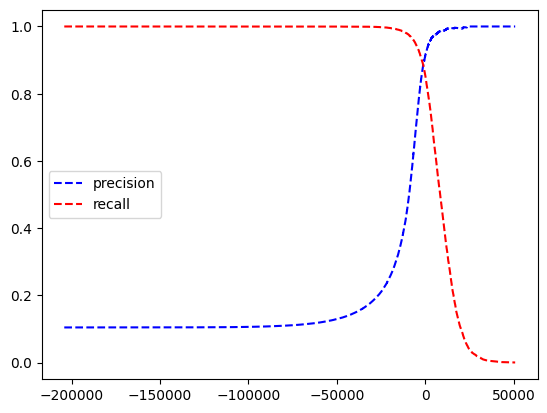

In [10]:
plt.plot(limits,prec[:-1],"b--",label="precision")
plt.plot(limits,rec[:-1],"r--",label="recall")
plt.legend()
plt.show()

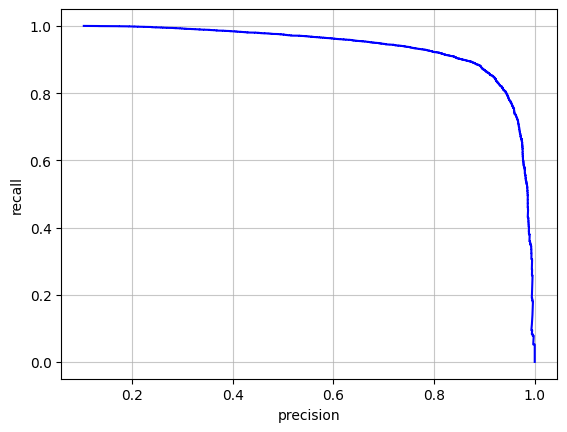

In [11]:
#compare perfomance:
plt.plot(prec[:-1],rec[:-1],"b-")
plt.xlabel("precision")
plt.ylabel("recall")
plt.grid(alpha=0.7)
plt.show()

In [12]:
#searching for accuracy 
limits_85=limits[np.argmax(precision>.85)] #get arg equal select range of precision in limits score
y_85=(y7_scores > limits)

print(f"scores : \n precision: {precision_score(y_train7,y_85)},\n recall: {recall_score(y_train7,y_85)},\n f1 : {f1_score(y_train7,y_85)}")

scores : 
 precision: 0.20265955580505948,
 recall: 0.9219473264166002,
 f1 : 0.3322786630616119


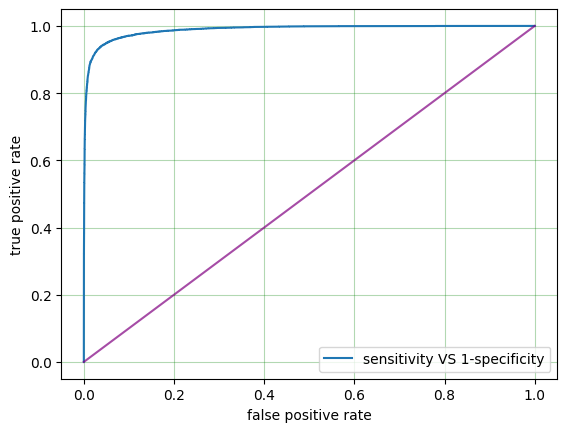

0.988546239188783


In [13]:
#roc curve

from sklearn.metrics import roc_curve

tpr,fpr,limit=roc_curve(y_train7,y7_scores) #tpr (true pos) x fpr (false pos) | positive: 7 , negative : non 7
#also : tnr ratio of negative instances as positive --> fpr = (1-tnr)

plt.plot(tpr,fpr,label="sensitivity VS 1-specificity")
plt.plot([0,1],[0,1],color="purple",alpha=0.7)
plt.grid(color="g",alpha=0.3)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend()
plt.show()

from sklearn.metrics import roc_auc_score
area=roc_auc_score(y_train7,y7_scores)
print(area) # perfect : 100

In [14]:
#Using and comparing random forest
from sklearn.ensemble import RandomForestClassifier #ensemble tells an way of combinations model

forest=RandomForestClassifier(random_state=4442)
y_for_scores=cross_val_predict(forest,x_train,y_train7,cv=3,method="predict_proba") #1 collunm: prb of positive class
print(y_for_scores)

[[0.99 0.01]
 [1.   0.  ]
 [0.86 0.14]
 ...
 [1.   0.  ]
 [0.99 0.01]
 [0.99 0.01]]


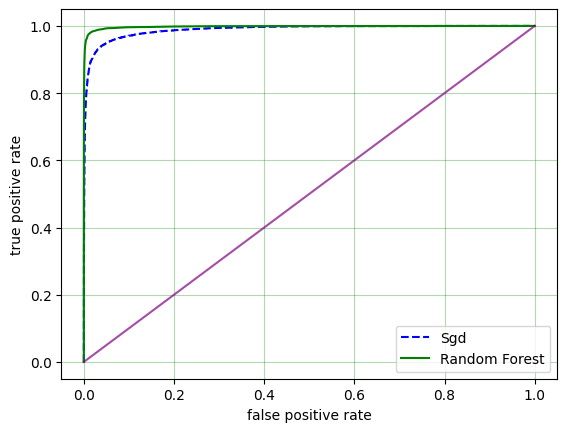

auc score0.9979040562257913


In [15]:
#Compare


forest_roc_y7=y_for_scores[:,1]
f_tpr,f_fpr,f_limit=roc_curve(y_train7,forest_roc_y7)


plt.plot(tpr,fpr,"b--",label="Sgd")
plt.plot(f_tpr,f_fpr,"g-",label="Random Forest")
plt.plot([0,1],[0,1],color="purple",alpha=0.7)
plt.grid(color="g",alpha=0.3)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend()
plt.show()

print(f'auc score{roc_auc_score(y_train7,forest_roc_y7)}')


In [16]:
#Using Support Vector Machine and Ovr,Ovo

from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train) # svm detects automatically the class
svm_pred=svm.predict([digit1])
print(svm_pred)


[7]


In [17]:
print(svm_pred)
#evaluating

y7_svm=svm.decision_function([digit1])
svm.classes_ # --> vectors detected by svm on multiclass
print(np.argmax(y7_svm),svm.classes_) # --> score of each vector comparing to the trin set,label : 7

[7]
7 [0 1 2 3 4 5 6 7 8 9]


In [18]:
#using ovr and ovo

from sklearn.multiclass import OneVsRestClassifier

ovr_class=OneVsRestClassifier(SVC()) #send svm model for classify based on ovr
ovr_class2=OneVsRestClassifier(RandomForestClassifier())
ovr_class.fit(x_train,y_train)
#print(f"{ovr_class.predict([digit1])} ,models_for_class: {len(ovr_class.estimators_)}")

#30 minutes for run lol



,estimator,SVC()
,n_jobs,None
,verbose,0
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001


In [19]:
svm.fit(x_train,y_train) # training again after ovr
svm_pred=svm.predict([digit1])
svm_new_scores=svm.decision_function([digit1])



In [26]:
#Perfomance and improving
from sklearn.preprocessing import StandardScaler

scaler1=StandardScaler()
x_train_better=scaler1.fit_transform(x_train.astype(np.float64))


#svm_cross=cross_val_score(svm,x_train,y_train,cv=3,scoring='accuracy')
#svm_cross_with_scaler=cross_val_score(svm,x_train_better,y_train,cv=3,scoring='accuracy')


In [ ]:
Improving 1 : Grid Search with class diferent models and Multiclass



In [27]:

#sgd:
ten_class_predict_sgd=cross_val_predict(sgd_class,x_train_better,y_train,cv=3)
conf_matrix_all_class=confusion_matrix(y_train,ten_class_predict_sgd)


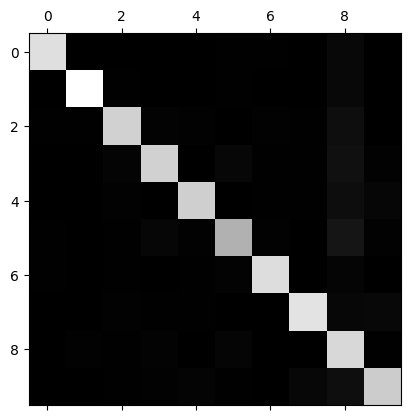

In [28]:
#transform in matrix :
# 
plt.matshow(conf_matrix_all_class,cmap=plt.cm.gray)
plt.show() 

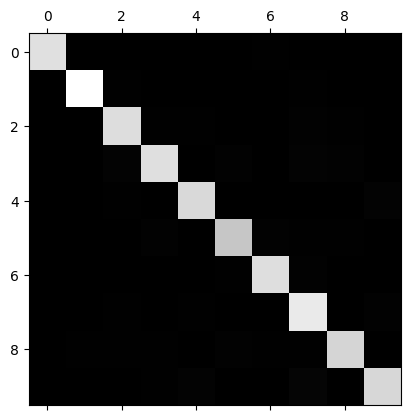

In [29]:
#confusion matrix with multiclass
 #svm:
ten_class_predict_svm=cross_val_predict(svm,x_train_better,y_train,cv=3)
conf_matrix_all_class_svm=confusion_matrix(y_train,ten_class_predict_svm)

plt.matshow(conf_matrix_all_class_svm,cmap=plt.cm.gray)
plt.show() 

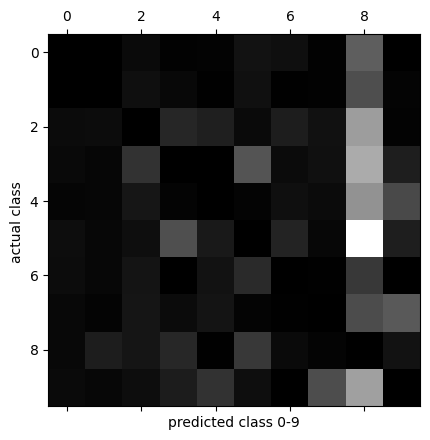

In [32]:
#class density:

rows_sm=conf_matrix_all_class.sum(axis=1,keepdims=True)
density_matrix=conf_matrix_all_class / rows_sm

#using binary for each class in diagonal
np.fill_diagonal(density_matrix,0)

#color dark: +correct-close, color bright : error-far

plt.matshow(density_matrix,cmap=plt.cm.gray)
plt.xlabel("predicted class 0-9")
plt.ylabel("actual class ")
plt.show()

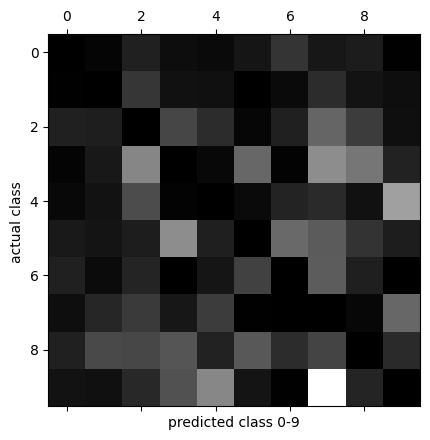

In [40]:
#class density:
#svm
rows_sm=conf_matrix_all_class.sum(axis=1,keepdims=True)
density_matrix=conf_matrix_all_class_svm/ rows_sm

#using binary for each class in diagonal
np.fill_diagonal(density_matrix,0)

#color dark: +correct-close, color bright : error-far

plt.matshow(density_matrix,cmap=plt.cm.gray)
plt.xlabel("predicted class 0-9")
plt.ylabel("actual class ")
plt.show()

In [ ]:
improving : using prerpocessing for indentify outliers and confusions,and handling with them

In [34]:
#Svm Version - View Confusions

#0-6 
xy1=x_train[(y_train==0) & (ten_class_predict_svm ==0)] #true positive 0
xy11=x_train[(y_train==0) & (ten_class_predict_svm ==6)] #false positive 0
yx1=x_train[(y_train==6) & (ten_class_predict_svm ==6)] #true positive 6
yx11=x_train[(y_train==6) & (ten_class_predict_svm ==0)] #false positive 6

#1-2
xy2=x_train[(y_train==1) & (ten_class_predict_svm ==1)] #true positive 3
xy22=x_train[(y_train==1) & (ten_class_predict_svm ==2)] #false positive 3
yx2=x_train[(y_train==2) & (ten_class_predict_svm ==2)] #true positive 5
yx22=x_train[(y_train==2) & (ten_class_predict_svm ==1)] #false positive 5

#2-7
xy3=x_train[(y_train==2) & (ten_class_predict_svm ==2)] #true positive 2
xy33=x_train[(y_train==2) & (ten_class_predict_svm ==7)] #false positive 2
yx3=x_train[(y_train==7) & (ten_class_predict_svm ==7)] #true positive 7
yx33=x_train[(y_train==7) & (ten_class_predict_svm ==2)] #false positive 7

#3-5
xy4=x_train[(y_train==3) & (ten_class_predict_svm ==3)] #true positive 3
xy44=x_train[(y_train==3) & (ten_class_predict_svm ==5)] #false positive 3
yx4=x_train[(y_train==5) & (ten_class_predict_svm ==5)] #true positive 5
yx44=x_train[(y_train==5) & (ten_class_predict_svm ==3)] #false positive 5

#6-5
xy5=x_train[(y_train==6) & (ten_class_predict_svm ==6)] #true positive 6
xy55=x_train[(y_train==6) & (ten_class_predict_svm ==5)] #false positive 6
yx5=x_train[(y_train==5) & (ten_class_predict_svm ==5)] #true positive 5
yx55=x_train[(y_train==5) & (ten_class_predict_svm ==6)] #false positive 5

#8-5
xy7=x_train[(y_train==8) & (ten_class_predict_svm ==8)] #true positive 8
xy77=x_train[(y_train==8) & (ten_class_predict_svm ==5)] #false positive 8
yx7=x_train[(y_train==5) & (ten_class_predict_svm ==5)] #true positive 5
yx77=x_train[(y_train==5) & (ten_class_predict_svm ==8)] #false positive 5

#9-4
xy8=x_train[(y_train==9) & (ten_class_predict_svm ==9)] #true positive 9
xy88=x_train[(y_train==9) & (ten_class_predict_svm ==4)] #false positive 9
yx8=x_train[(y_train==4) & (ten_class_predict_svm ==4)] #true positive 4
yx88=x_train[(y_train==4) & (ten_class_predict_svm ==9)] #false positive 4


ValueError: Single argument to subplot must be a three-digit integer, not 7410

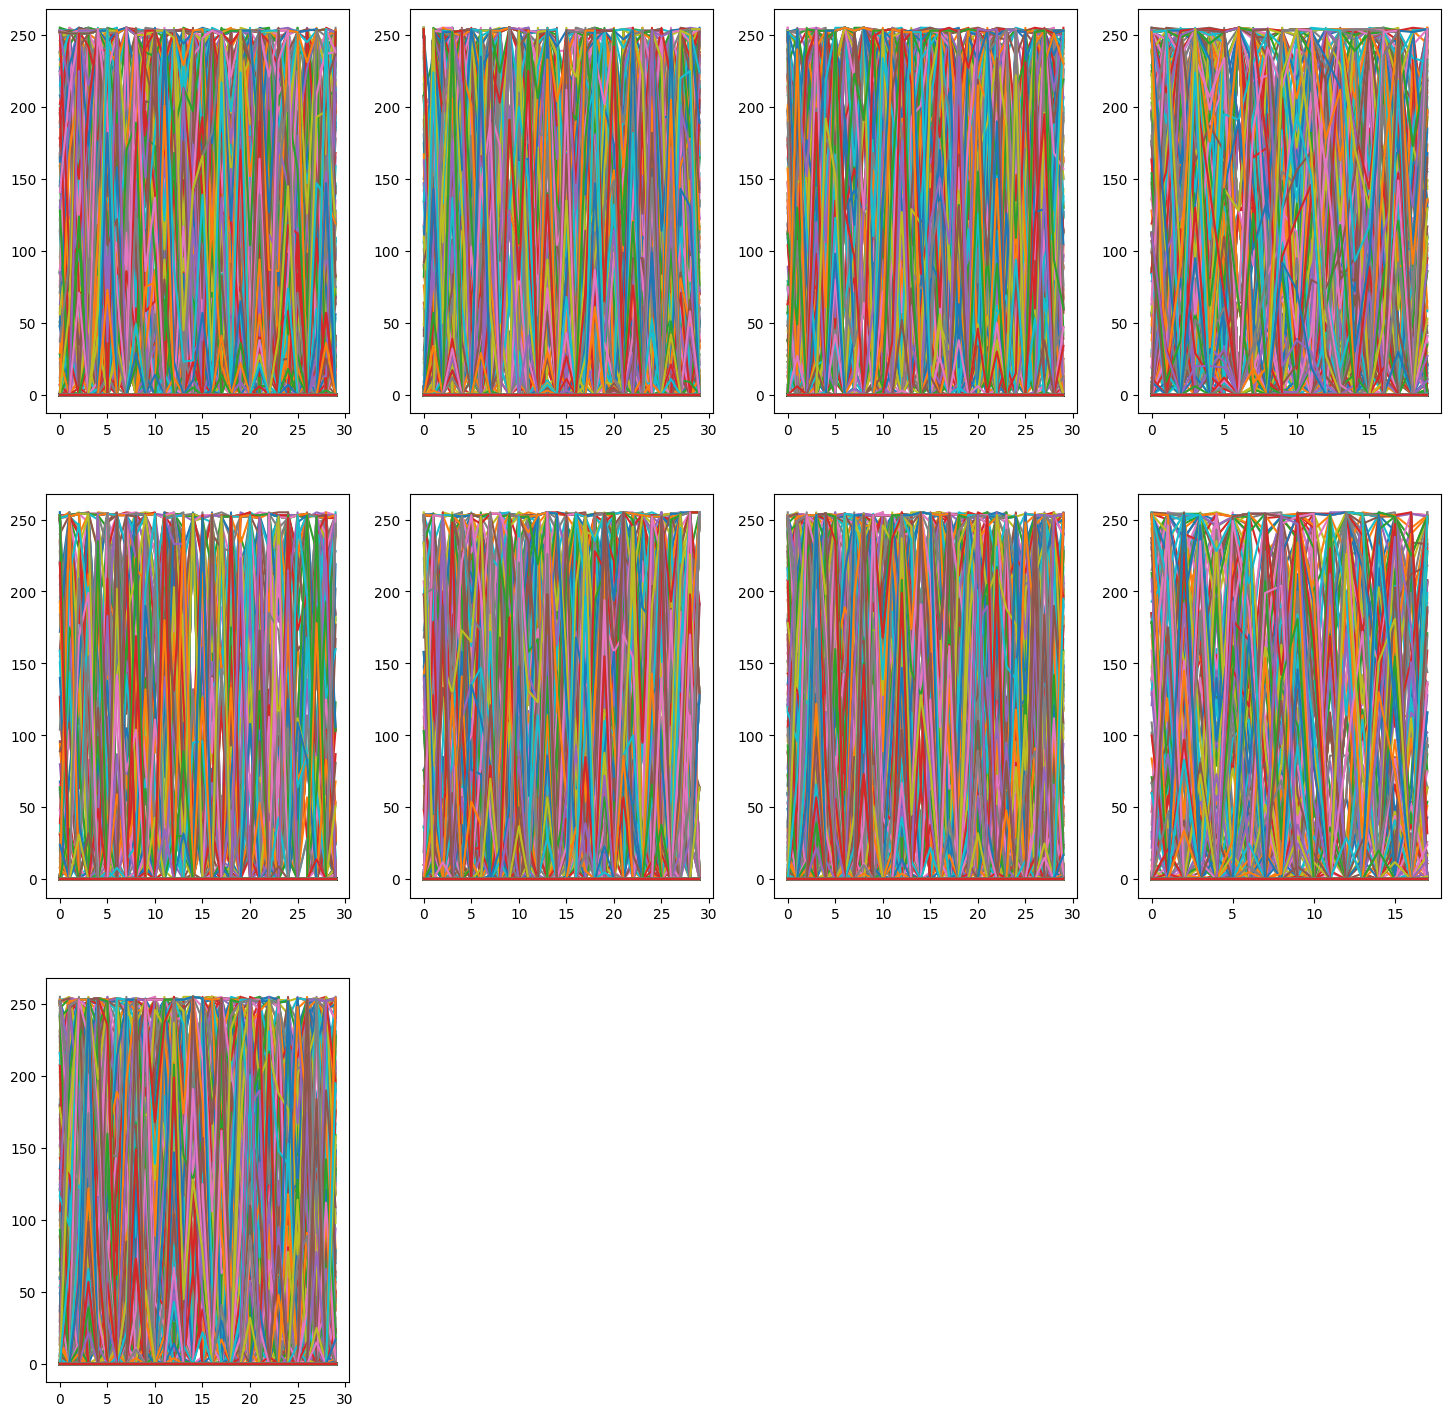

In [ ]:

#for fixing later

plt.figure(figsize=(18,43))
plt.subplot(741) ; plt.plot(xy1[:30])
plt.subplot(742) ; plt.plot(xy11[:30])
plt.subplot(743) ; plt.plot(yx1[:30])
plt.subplot(744) ; plt.plot(yx11[:30])


plt.subplot(745) ; plt.plot(xy2[:30])
plt.subplot(746) ; plt.plot(xy22[:30])
plt.subplot(747) ; plt.plot(yx2[:30])
plt.subplot(748) ; plt.plot(yx22[:30])


plt.subplot(749) ; plt.plot(xy3[:30])
plt.subplot(7410) ; plt.plot(xy33[:30])
plt.subplot(7411) ; plt.plot(yx3[:30])
plt.subplot(7412) ; plt.plot(yx33[:30])


plt.subplot(7413) ; plt.plot(xy4[:30])
plt.subplot(7414) ; plt.plot(xy44[:30])
plt.subplot(7415) ; plt.plot(yx4[:30])
plt.subplot(7416) ; plt.plot(yx44[:30])

plt.subplot(7417) ; plt.plot(xy5[:30])
plt.subplot(7418) ; plt.plot(xy55[:30])
plt.subplot(7419) ; plt.plot(yx5[:30])
plt.subplot(7420) ; plt.plot(yx55[:30])


plt.subplot(7421) ; plt.plot(xy7[:30])
plt.subplot(7422) ; plt.plot(xy77[:30])
plt.subplot(7423) ; plt.plot(yx7[:30])
plt.subplot(7424) ; plt.plot(yx77[:30])


plt.subplot(7425) ; plt.plot(xy8[:30])
plt.subplot(7426) ; plt.plot(xy88[:30])
plt.subplot(7427) ; plt.plot(yx8[:30])
plt.subplot(7428) ; plt.plot(yx88[:30])

In [ ]:
#Sgd Version - View Confusions

xy1=x_train[(y_train==3) & (ten_class_predict_sgd ==3)] #true positive 3
xy2=x_train[(y_train==3) & (ten_class_predict_sgd ==5)] #false positive 3

xy1=x_train[(y_train==5) & (ten_class_predict_sgd ==5)] #true positive 5
xy2=x_train[(y_train==5) & (ten_class_predict_sgd ==3)] #false positive 5


In [41]:
#Multilabel Class (more than 0ne target using binary system)

class1_bigger_5=(y_train>5)
class_2_div=(y_train % 2==0)

multilabel_class1=np.c_[class1_bigger_5,class_2_div]

#using K_neighbors for multilabel
from sklearn.neighbors import KNeighborsClassifier
knn_multilabel=KNeighborsClassifier(n_neighbors=5)
knn_multilabel.fit(x_train,multilabel_class1)
predict_knn=knn_multilabel.predict([digit1])

#score:
y_multilabel_predict=cross_val_predict(knn_multilabel,x_train,multilabel_class1,cv=3)
f1_multiclass=f1_score(multilabel_class1,y_multilabel_predict,average='macro')



In [57]:
print(f'knn multiclass f1 score: {f1_multiclass} ')

knn multiclass f1 score: 0.9781811708153896 


In [ ]:
#Multioutput Multiclass
#basically gives a vector with diferents results for each value

#trying remove noise from num images

#creating noise images from mnist

noise_train=np.random.randint(0,100,(len(x_train),784))
noise_test=np.random.randint(0,100,(len(x_test),784))

print(noise_train)
x_noise_num=x_train + noise_train
y_noise_num=x_train # target
x_test_noise=x_test + noise_test
y_test_noise=x_test

some_digit=x_noise_num[6666]
digit_noise=some_digit.reshape(28,28)


[[38 13 28 ... 77  4 12]
 [18 78  7 ... 92 46 42]
 [24 21 66 ... 71 22 47]
 ...
 [71 17 74 ... 47 46 31]
 [24 83 69 ... 16  1 14]
 [23 33 55 ... 18 73  6]]



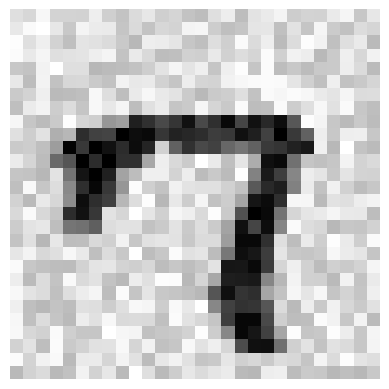

In [44]:
plt.imshow(digit_noise,cmap='binary')
plt.axis('off')
plt.show()

In [56]:
#training knn

knn_noise=KNeighborsClassifier(n_neighbors=5)
knn_noise.fit(x_noise_num,y_noise_num)
      
      

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


predict:


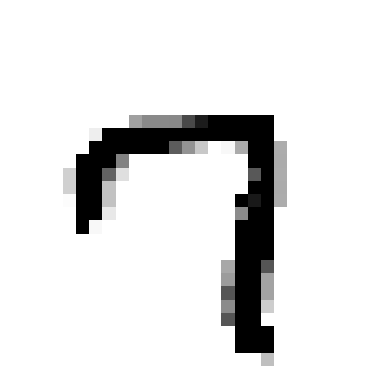

original with noise:


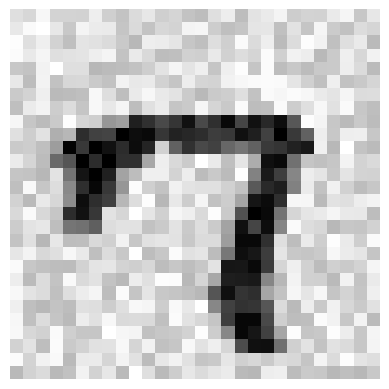

original:


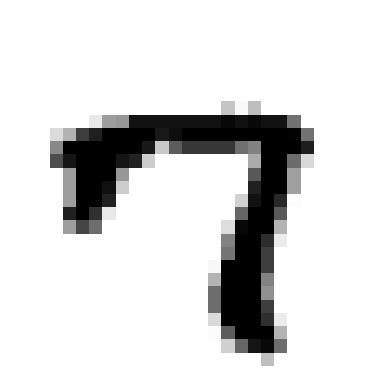

In [55]:

print("predict:")
predict_noise=knn_noise.predict([some_digit]).reshape(28,28)
plt.imshow(predict_noise,cmap='binary')
plt.axis('off')
plt.show()

print("original with noise:")
plt.imshow(digit_noise,cmap='binary')
plt.axis('off')
plt.show()

print("original:")
plt.imshow(digittt,cmap='binary')
plt.axis('off') 
plt.show()